# ***THEORY QUESTION***

## **Q1.What is Boosting in Machine Learning?**

Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees) to create a strong predictive model.

* Train models sequentially.

* Each new model tries to correct the errors made by the previous models.

* Final prediction is a weighted combination of all models.

## **Q2.How does Boosting differ from Bagging?**

| **Aspect**                | **Bagging (Bootstrap Aggregating)**                                    | **Boosting**                                                                             |
| ------------------------- | ---------------------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **Purpose**               | Reduce **variance**                                                    | Reduce **bias** (and also variance)                                                      |
| **Model Training**        | Models are trained **independently & in parallel**                     | Models are trained **sequentially**, each learning from the previous model's errors      |
| **Data Sampling**         | Uses **bootstrapped samples** (random sampling with replacement)       | Each model gets **adjusted weights** on data points (focuses more on difficult examples) |
| **Example Algorithms**    | Random Forest, Bagging Classifier/Regressor                            | AdaBoost, Gradient Boosting, XGBoost, LightGBM                                           |
| **Combining Predictions** | **Average** (for regression) or **majority vote** (for classification) | **Weighted sum** of predictions                                                          |
| **Overfitting Tendency**  | Less prone to overfitting (especially with strong learners)            | More prone to overfitting (if not properly tuned)                                        |
| **Focus**                 | Focuses on reducing **model variance**                                 | Focuses on reducing **both bias and variance**                                           |
| **Complexity**            | Simple and easy to parallelize                                         | More complex and difficult to parallelize                                                |


## **Q3.What is the key idea behind AdaBoost?**

AdaBoost is an ensemble learning method that focuses on correcting mistakes of weak learners by adjusting the importance (weights) of training samples.

- Train weak learners (usually Decision Stumps—simple decision trees).

- After each iteration, increase the weights of misclassified samples, so the next learner focuses more on these "hard" examples.

- Combine all learners into a single strong model using weighted majority voting (for classification) or weighted sum (for regression).

**How AdaBoost Works (Step by Step):**
1. Start: Assign equal weights to all training samples.

2. Train the first weak learner.

3. Evaluate predictions:

 - If a sample is misclassified, increase its weight.

 - Correctly classified samples get decreased weight.

4. Train the next learner with this updated distribution.

5. Repeat for a fixed number of learners (or until perfect classification).

6. Final prediction: A weighted vote of all the learners

## **Q4. Explain the working of AdaBoost with an example?**

**AdaBoost Working Example:**

**Toy Dataset:**

| Sample | Feature | Class Label |
| ------ | ------- | ----------- |
| 1      | 2       | +1          |
| 2      | 4       | +1          |
| 3      | 6       | -1          |
| 4      | 8       | -1          |

 We want to build a classifier to predict +1 or -1.


**1. Initialize Weights**
- Each sample is equally important at the start.

- Weight for each sample = 1/4 = 0.25

**2. Train First Weak Learner**
Let’s say the first Decision Stump splits the data at Feature = 5:

- If Feature ≤ 5 → Predict +1  
Else → Predict -1

-  **Predictions:**

| Sample | Feature | True Label | Predicted | Correct? |
| ------ | ------- | ---------- | --------- | -------- |
| 1      | 2       | +1         | +1        | Yes      |
| 2      | 4       | +1         | +1        | Yes      |
| 3      | 6       | -1         | -1        | Yes      |
| 4      | 8       | -1         | -1        | Yes      |

All correct — Error = 0

Since error = 0, this learner is perfect, and AdaBoost may stop here. But to explain further,
let’s consider an error case.



**3. Suppose Learner made a mistake:**

- Imagine the classifier wrongly predicted Sample 3:

| Sample | True Label | Predicted | Correct? |
| ------ | ---------- | --------- | -------- |
| 3      | -1         | +1        |  No     |

Now:
- Total error = Weight of misclassified samples = 0.25

- Error rate (e) = 0.25

Compute learner weight (alpha):

$$\alpha = \frac{1}{2} \ln \left( \frac{e}{1 - e} \right) = \frac{1}{2} \ln \left( \frac{0.25}{0.75} \right) = 0.5 \ln(3) \approx 0.55$$


**4.Update Weights for Samples:**

- Misclassified Sample 3: Increase weight

- Correct Samples: Decrease weight

New weight formula:

$$
w_{\text{new}} = w_{\text{old}} \times e^{\pm \alpha}
$$

- Misclassified $\rightarrow$ multiplied by $e^{+\alpha}$

- Correct $\rightarrow$ multiplied by $e^{-\alpha}$

Then normalize so total weights sum to 1.

**5. Train Next Weak Learner on Updated Weights**

- New classifier focuses more on Sample 3 to try and classify it correctly.

- Process repeats for T rounds or until perfect classification.

**Final Prediction:**

Each weak learner votes with weight α:

$$
\text{Final prediction} = \text{sign} \left( \sum_{t=1}^{T} \alpha_t h_t(x) \right)
$$

Where:
- $\alpha_t$ : importance of learner $t$

- $h_t(x)$ : prediction by learner $t$


## **Q5.What is Gradient Boosting, and how is it different from AdaBoost?**

Gradient Boosting is an ensemble learning technique that builds models sequentially, where each new model tries to correct the errors (residuals) made by the previous models.

| **Aspect**                  | **AdaBoost**                                                 | **Gradient Boosting**                                           |
| --------------------------- | ------------------------------------------------------------ | --------------------------------------------------------------- |
| **Error Correction Method** | **Adjusts sample weights** — harder samples get more weight. | **Minimizes the loss gradient** — fits new models to residuals. |
| **Interpretation**          | Focuses on "hard to classify" samples.                       | Focuses on reducing the overall **error directly**.             |
| **Loss Function**           | Exponential loss (default)                                   | Any differentiable loss (e.g., MSE, Log Loss)                   |
| **Model Update**            | Weighted vote of weak learners                               | Additive model (new tree added to correct residuals)            |
| **Base Learner**            | Typically shallow **Decision Stumps**                        | Typically **deep Decision Trees**                               |
| **Robustness to Noise**     | Less robust (sensitive to outliers)                          | More robust (custom loss functions possible)                    |


## **Q6.What is the loss function in Gradient Boosting?**

A loss function measures the difference between the actual (true) values and the predicted values. It tells the algorithm how bad the model is performing, so it can adjust to minimize this error.


**Important in Gradient Boosting**

- Gradient Boosting computes the gradient (derivative) of this loss function.

- At each iteration, the algorithm fits a model to predict the negative gradient (residual) of the loss function with respect to the predictions.

- The choice of loss function defines the "goal": e.g., predicting exact values, predicting class probabilities, etc.



## **Q7.How does XGBoost improve over traditional Gradient Boosting?**

XGBoost (Extreme Gradient Boosting) is an advanced, optimized version of Gradient Boosting designed to be faster, more accurate, and scalable. Here’s how it improves over the traditional Gradient Boosting:

**Regularization (to Prevent Overfitting)**

- **Traditional GB:** No built-in regularization.

- **XGBoost:** Includes L1 (Lasso) and L2 (Ridge) regularization on tree weights to control model complexity and prevent overfitting.

$$
\text{Objective} = \text{Loss} + \Omega(\text{model complexity})
$$


**Advanced Tree Pruning (Depth-wise Growth)**
- **Traditional GB:** Grows trees to maximum depth, then prunes.

- **XGBoost:** Uses a "max_depth" or "max_leaves" parameter and performs pruning based on gain (loss reduction) to grow only useful branches.

**Handling Missing Values**
- **Traditional GB:** Needs preprocessing or imputation.

- **XGBoost:** Automatically handles missing data by learning the best direction to handle missing values during training.

**Parallelization**
- **Traditional GB:** Grows trees sequentially, no parallelism in split finding.

- **XGBoost:** Parallelizes tree construction using optimized data structures (e.g., quantile sketches) to make training much faster.

**Weighted Quantile Sketch**
- Helps to efficiently handle sparse data and large datasets.

- Improves split finding in imbalanced datasets (rare class problems).

**Approximate Tree Learning**
- XGBoost uses histogram-based algorithms for faster and more memory-efficient tree building compared to exact greedy methods in traditional GB.

**Scalable to Out-of-Core Learning**
- XGBoost can handle very large datasets that don't fit into memory by using disk-based learning (out-of-core computation).

**Early Stopping**
- Automatically halts training if no improvement in validation loss is seen for a specified number of rounds.


## **Q8.What is the difference between XGBoost and CatBoost?**

| **Aspect**                                   | **XGBoost**                                                             | **CatBoost**                                                                                                     |
| -------------------------------------------- | ----------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **Developer**                                | Open-source community                                                   | Yandex (Russian search engine company)                                                                           |
| **Categorical Features Handling**            | Requires **manual encoding** (e.g., Label Encoding or One-Hot Encoding) | **Automatic handling** of categorical features (no manual preprocessing needed)                                  |
| **Training Speed**                           | Fast, especially with parallel computation                              | Generally **slower per iteration**, but may need **fewer iterations** due to better handling of categorical data |
| **Accuracy (on categorical-heavy datasets)** | Might be lower unless **careful preprocessing** is done                 | Often **higher** on datasets with many categorical variables                                                     |
| **Missing Values**                           | Handles missing values automatically                                    | Handles missing values automatically                                                                             |
| **Overfitting Control**                      | L1/L2 Regularization, Early Stopping                                    | **Ordered Boosting** to reduce overfitting, plus L2 regularization                                               |
| **GPU Support**                              | Yes (well-optimized GPU support)                                        | Yes (also offers good GPU acceleration)                                                                          |
| **Ease of Use**                              | Requires more manual data prep (esp. for categoricals)                  | Very easy to use with **raw categorical data**                                                                   |
| **Interpretability Tools**                   | SHAP values, feature importance                                         | SHAP values, **advanced built-in visualizations**                                                                |
| **Out-of-Core Learning**                     | Supported                                                               | Limited                                                                                                          |
| **Typical Use Cases**                        | Tabular data, ranking, classification, regression                       | Categorical-heavy datasets, small-medium tabular data                                                            |


## **Q9.What are some real-world applications of Boosting techniques?**

**Fraud Detection (Credit Card, Insurance, Banking)**
- Detect rare fraudulent transactions in credit card and banking data.

- Boosting helps to handle class imbalance and uncover subtle fraudulent patterns.

- Example: Credit card fraud detection models in banks.

**Credit Risk Scoring**
- Assess customer risk before issuing loans.

- Boosting improves classification of loan defaults or payment delays.

- Example: Credit score calculation in financial institutions.

**Healthcare (Disease Prediction & Diagnosis)**
- Predict diseases like cancer, diabetes based on patient data.

- Used in early cancer detection (e.g., breast cancer), patient readmission prediction.

- Example: Breast cancer detection using Gradient Boosting.

**Recommendation Systems**
- Suggest products, movies, or services to users.

- Boosting can improve ranking algorithms and predict user preferences.

- Example: Netflix, Amazon, and YouTube recommendation engines.

**Marketing and Customer Churn Prediction**
- Identify customers likely to leave a service.

- Boosting accurately predicts customer churn, allowing for proactive marketing.

- Example: Telecom companies predicting subscriber churn.

**Self-Driving Cars (Perception Systems)**
- Object detection and classification from camera and sensor data.

- Boosting models assist in lane detection, pedestrian recognition.

- Example: Perception stack in autonomous vehicles.

**Text Classification & Sentiment Analysis**
- Classify emails as spam/ham, detect fake news, or analyze sentiment.

- Boosting techniques are widely used in natural language processing (NLP).

- Example: Spam filters in Gmail, sentiment analysis on Twitter data.

**Cybersecurity**
- Detect intrusion, malware, or anomalous activities in network logs.

- Boosting helps spot rare but critical security threats.

- Example: Network intrusion detection systems (IDS).

**Real Estate Price Prediction**
- Predict house prices based on location, features, and market data.

- Boosting models often win in Kaggle competitions for this task.

**Image Classification** - - - (Computer Vision)
Classify and detect objects in images.

- Boosting algorithms (like AdaBoost) were originally used in face detection systems.

- Example: Early versions of face detection in cameras (Viola-Jones algorithm with AdaBoost).

## **Q10.How does regularization help in XGBoost?**



Regularization is a technique used to penalize complex models to prevent overfitting — when a model learns noise from training data instead of the true underlying patterns.

**Regularization in XGBoost:**

XGBoost includes two types of regularization terms in its objective function:

$$
\text{Obj} = \sum_{i} l(y_i, \hat{y}_i) + \sum_{k} \Omega(f_k)
$$

where

$$
\Omega(f_k) = \gamma T + \frac{1}{2} \lambda \sum_{j} w_j^2
$$

| **Benefit**                | **Explanation**                                                                      |
| -------------------------- | ------------------------------------------------------------------------------------ |
| **Prevents Overfitting**   | Regularization penalizes overly complex trees (too many leaves or large weights).    |
| **Controls Tree Growth**   | The parameter $\gamma$ discourages adding unnecessary leaves, simplifying the model. |
| **Reduces Variance**       | L2 penalty on leaf scores $\lambda$ reduces model sensitivity to noise in data.      |
| **Balances Bias-Variance** | Helps the model generalize better on unseen data by controlling its flexibility.     |


## **Q11.What are some hyperparameters to tune in Gradient Boosting models?**

| **Hyperparameter**      | **Description**                                                             | **Effect**                                            |
| ----------------------- | --------------------------------------------------------------------------- | ----------------------------------------------------- |
| **n\_estimators**       | Number of boosting rounds (trees).                                          | Higher = more complex model, risk of overfitting.     |
| **learning\_rate**      | Shrinks contribution of each tree. (a.k.a. shrinkage)                       | Lower = slower learning, requires more trees.         |
| **max\_depth**          | Maximum depth of individual trees.                                          | Controls model complexity.                            |
| **min\_samples\_split** | Minimum samples required to split an internal node.                         | Larger = more conservative tree.                      |
| **min\_samples\_leaf**  | Minimum samples at a leaf node.                                             | Helps control overfitting.                            |
| **subsample**           | Fraction of samples to train each tree (stochastic boosting).               | Reduces variance, speeds up training.                 |
| **max\_features**       | Maximum features to consider when splitting a node.                         | Reduces overfitting, increases diversity among trees. |
| **loss**                | Loss function to optimize (e.g., "deviance", "exponential").                | Changes model’s learning behavior.                    |
| **criterion**           | Function to measure the quality of a split ("friedman\_mse", "mse", "mae"). | Affects tree splits.                                  |




## **Q12.What is the concept of Feature Importance in Boosting?**

Feature Importance in Boosting refers to a technique that quantifies the contribution of each feature in predicting the target variable. In Boosting models (like XGBoost, LightGBM), feature importance helps identify which features the model relied on the most when making decisions.

**Concepts:**
- **Split Importance (Gain):** Measures the improvement in loss (e.g., Gini, log-loss) when a feature is used for splitting.

- **Frequency (Weight):** Counts how many times a feature was used in all splits.

- **Cover:** Measures the number of samples affected by splits using that feature.

**Importantance**
- Helps in feature selection.

- Allows model interpretability.

- Can guide data collection and engineering.

## **Q13. Why is CatBoost efficient for categorical data?**

**Native Handling of Categorical Features:**

- CatBoost automatically detects categorical variables — no need for manual encoding (like One-Hot or Label Encoding).

- It uses Ordered Target Statistics or Conditional Probability Encoding to convert categorical values based on target distribution, avoiding data leakage.

**Reduces Overfitting:**
- Uses Permutation-driven techniques to prevent target leakage during encoding.

- Avoids the problem of overfitting common in naive target encoding.

**Efficient & Fast:**
- Optimized for large-scale categorical data — especially useful in datasets with many high-cardinality categorical features.

- Built-in efficient CPU and GPU support.

**Simplifies Workflow:**
- No need for explicit preprocessing or encoding.

- Saves time and effort in feature engineering.

# ***PRACTICAL***

## **Q14.Train an AdaBoost Classifier on a sample dataset and print model accuracy.**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#load the dataset
data = load_iris()
X = data.data
y = data.target

#Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

#Train the model
adaboost_clf.fit(X_train, y_train)

#Make predictions
y_pred = adaboost_clf.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

#Print accuracy
print(f"AdaBoost Classifier Accuracy: {accuracy:.2f}")


AdaBoost Classifier Accuracy: 1.00


## **Q15.Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#load the dataset
data = fetch_california_housing()
X = data.data
y = data.target


#Split data into Training and Testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)

#Train the Regressor
adaboost_regressor.fit(X_train, y_train)

#Predict on Test set
y_pred = adaboost_regressor.predict(X_test)

#Evaluate performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

#Print the MAE
print(f"AdaBoost Regressor Mean Absolute Error (MAE): {mae:.2f}")



AdaBoost Regressor Mean Absolute Error (MAE): 0.76


## **Q16.Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance**

Gradient Boosting Classifier Accuracy: 0.96

Top 5 Important Features:
                 Feature  Importance
7    mean concave points    0.434897
27  worst concave points    0.273841
22       worst perimeter    0.050974
23            worst area    0.047995
21         worst texture    0.047193


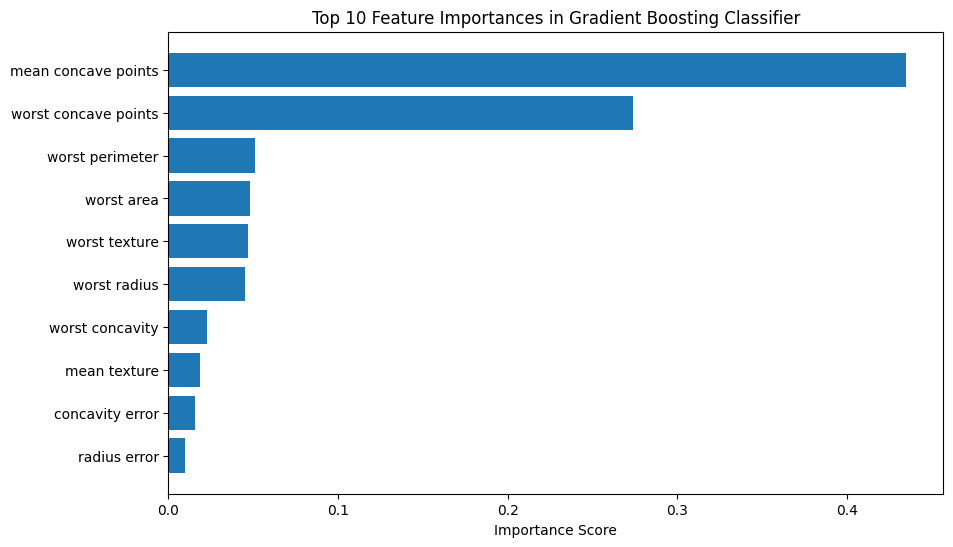

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

#load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

#Train the classifier
gb_clf.fit(X_train, y_train)

#Predict and print accuracy
y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy:.2f}")

#Get and print feature importance
importances = gb_clf.feature_importances_

#Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 5 Important Features:")
print(feature_importance_df.head())

#Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel("Importance Score")
plt.title("Top 10 Feature Importances in Gradient Boosting Classifier")
plt.gca().invert_yaxis()
plt.show()

## **Q17.Train a Gradient Boosting Regressor and evaluate using R-Squared Score.**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

#Train the model
gb_regressor.fit(X_train, y_train)

#Predict on test data
y_pred = gb_regressor.predict(X_test)

#Evaluate using R-Squared Score
r2 = r2_score(y_test, y_pred)

#Print the R-Squared Score
print(f"Gradient Boosting Regressor R-Squared Score: {r2:.2f}")


Gradient Boosting Regressor R-Squared Score: 0.78


## **Q18.Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

#Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)

#Initialize XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

#Print comparison results
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

Gradient Boosting Accuracy: 0.96
XGBoost Accuracy: 0.97


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:01:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
!pip install xgboost

## **Q19.Train a CatBoost Classifier and evaluate using F1-Score.**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize CatBoostClassifier
model = CatBoostClassifier(verbose=0, random_state=42)

#Train the model
model.fit(X_train, y_train)

#Predict on test set
y_pred = model.predict(X_test)

#Calculate F1 Score
f1 = f1_score(y_test, y_pred)

#Print result
print(f"CatBoost Classifier F1-Score: {f1:.2f}")


CatBoost Classifier F1-Score: 0.98


## **Q20.Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).**

In [ ]:
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)


#Train the model
xgb_reg.fit(X_train, y_train)

#Predict on the test set
y_pred = xgb_reg.predict(X_test)

#Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

#Print the result
print(f"XGBoost Regressor Mean Squared Error (MSE): {mse:.2f}")


XGBoost Regressor Mean Squared Error (MSE): 0.21


## **Q21.Train an AdaBoost Classifier and visualize feature importance.**

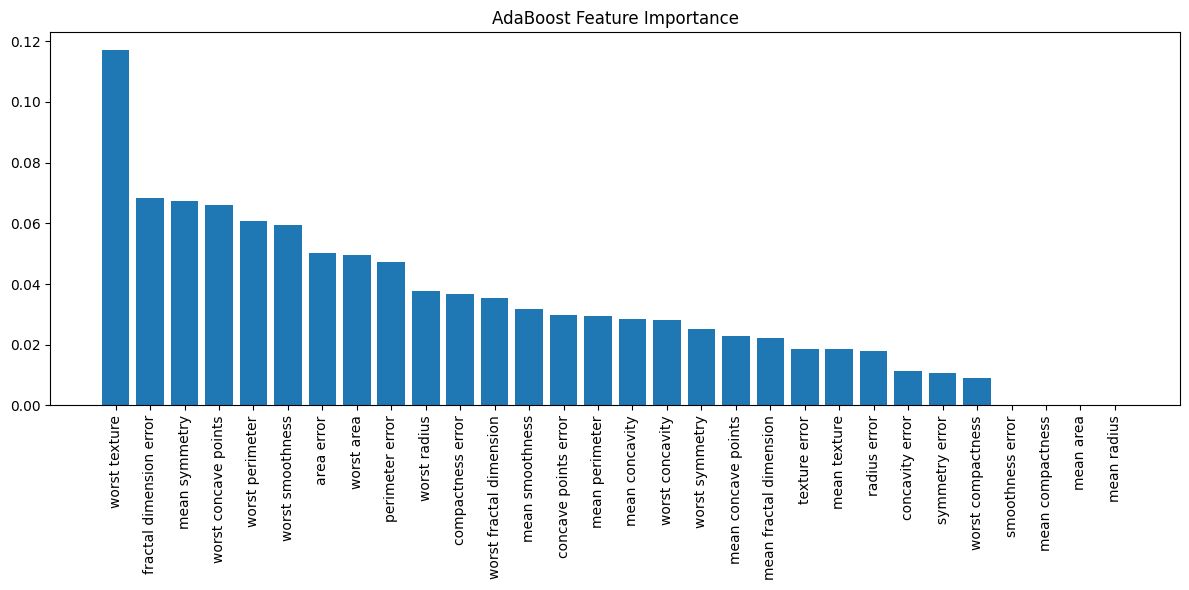

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

#load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Initialize and train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

#get feature importances
importances = model.feature_importances_

#Sort feature importances in descending order
indices = np.argsort(importances)[::-1]


#Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("AdaBoost Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

## **Q22.Train a Gradient Boosting Regressor and plot learning curves.**

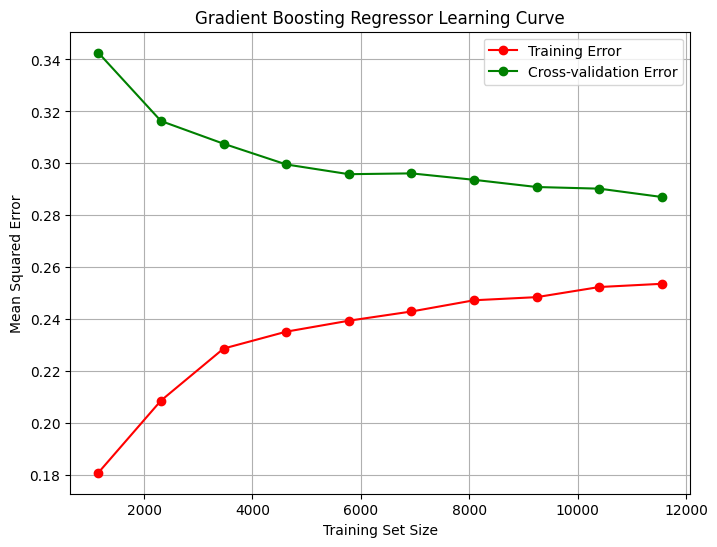

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt
import numpy as np

#load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

#Compute Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=1)

#Calculate mean and standard deviation
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

#Plot Learning Curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Error")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Error")
plt.title("Gradient Boosting Regressor Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid()
plt.show()

## **Q23.Train an XGBoost Classifier and visualize feature importance.**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:14:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Accuracy: 0.94


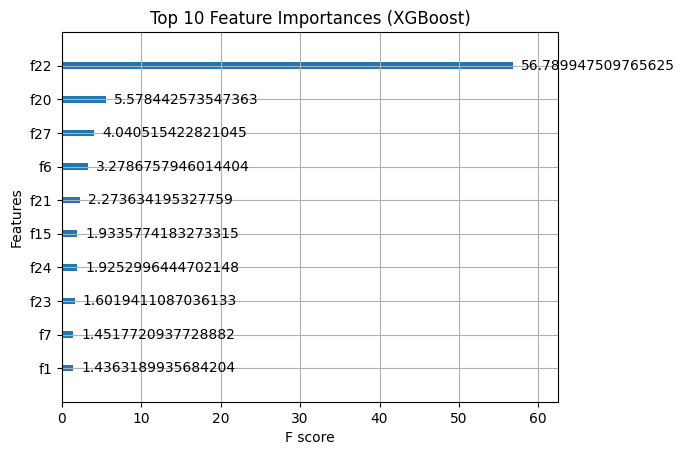

In [5]:

import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Initialize and train XGBoost Classifier
model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

#Predict and check accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Classifier Accuracy: {accuracy:.2f}")

#Plot feature importance
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()

## **Q24.Train a CatBoost Classifier and plot the confusion matrix.**

CatBoost Classifier Accuracy: 0.98


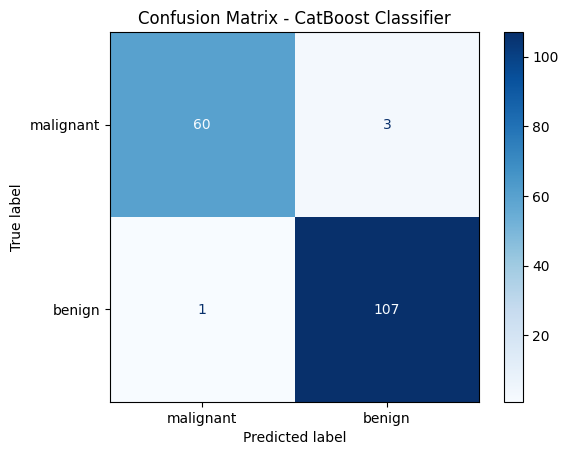

In [7]:

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

#load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Accuracy: {accuracy:.2f}")

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

## **Q25.Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.**

AdaBoost Classifier with 10 estimators - Accuracy: 0.9123
AdaBoost Classifier with 50 estimators - Accuracy: 0.9415
AdaBoost Classifier with 100 estimators - Accuracy: 0.9474
AdaBoost Classifier with 150 estimators - Accuracy: 0.9708
AdaBoost Classifier with 200 estimators - Accuracy: 0.9708


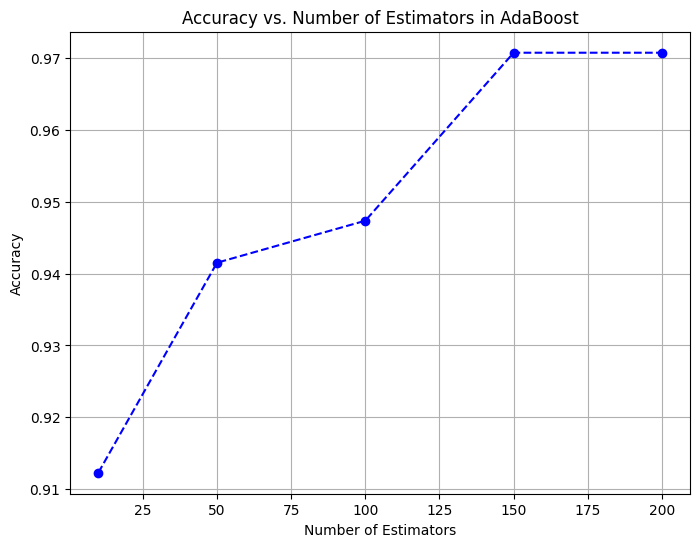

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Different numbers of estimators to try
n_estimators_list = [10, 50, 100, 150, 200]
accuracies = []

for n_estimators in n_estimators_list:
    model = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"AdaBoost Classifier with {n_estimators} estimators - Accuracy: {acc:.4f}")


#plotting the comparison
plt.figure(figsize=(8,6))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. Number of Estimators in AdaBoost')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## **Q26.Train a Gradient Boosting Classifier and visualize the ROC curve.**

Gradient Boosting Classifier AUC: 0.9951


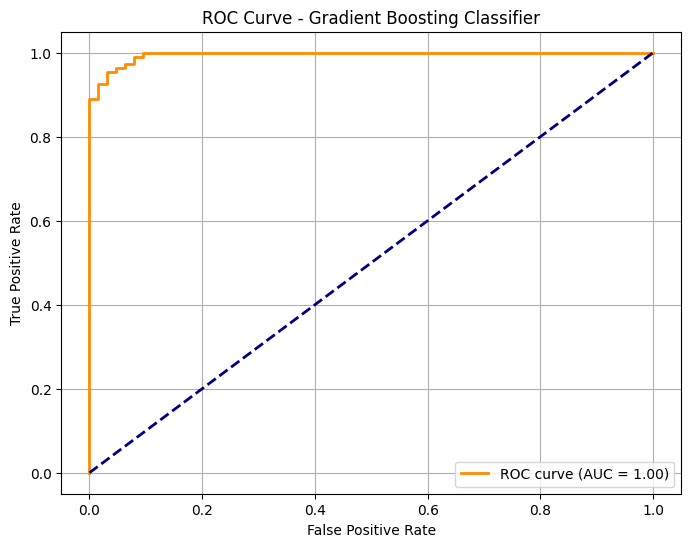

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, accuracy_score
import matplotlib.pyplot as plt

#load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize and train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

#Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"Gradient Boosting Classifier AUC: {roc_auc:.4f}")

#Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## **Q27.Train an XGBoost Regressor and tune the learning rate using GridSearchCV.**

In [11]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

#load the datset
data = load_diabetes()
X = data.data
y = data.target

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

#Define hyperparameter grid for 'learning_rate'
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=1)

#Fit model
grid_search.fit(X_train, y_train)

#Best parameters
print("Best learning rate found: ", grid_search.best_params_)

#Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error (MSE): {mse:.2f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best learning rate found:  {'learning_rate': 0.01}
Test Mean Squared Error (MSE): 3341.87


## **Q28.Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.**

In [12]:

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

#Generate an imbalanced dataset
X, y = make_classification(n_samples=2000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#CatBoost Classifier without class weights
model_no_weight = CatBoostClassifier(verbose=0, random_state=42)
model_no_weight.fit(X_train, y_train)
y_pred_no_weight = model_no_weight.predict(X_test)

print("=== Performance without Class Weighting ===")
print(classification_report(y_test, y_pred_no_weight))


#Calculate class weights manually
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
print("Calculated Class Weights:", class_weight_dict)


#CatBoost Classifier with class weights
model_with_weight = CatBoostClassifier(class_weights=list(class_weight_dict.values()), verbose=0, random_state=42)
model_with_weight.fit(X_train, y_train)
y_pred_with_weight = model_with_weight.predict(X_test)

print("\n=== Performance with Class Weighting ===")
print(classification_report(y_test, y_pred_with_weight))





=== Performance without Class Weighting ===
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       533
           1       0.76      0.75      0.75        67

    accuracy                           0.94       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.94      0.94      0.94       600

Calculated Class Weights: {np.int64(0): np.float64(0.5524861878453039), np.int64(1): np.float64(5.2631578947368425)}

=== Performance with Class Weighting ===
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       533
           1       0.74      0.96      0.83        67

    accuracy                           0.96       600
   macro avg       0.86      0.96      0.90       600
weighted avg       0.97      0.96      0.96       600



## **Q29.Train an AdaBoost Classifier and analyze the effect of different learning rates.**

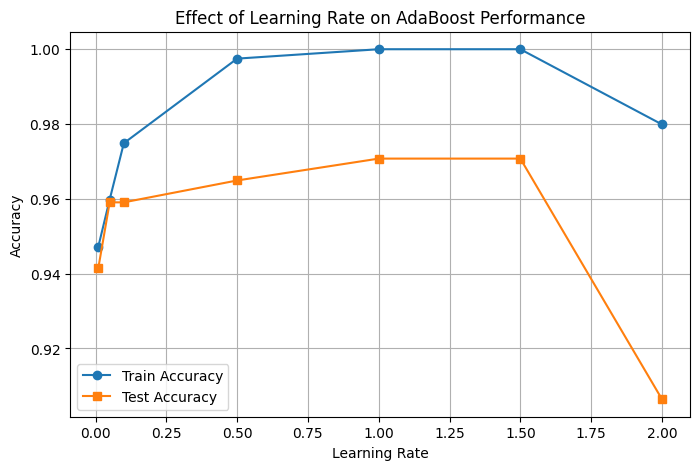

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Different learning rates to try
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0]
train_accuracies = []
test_accuracies = []

#Evaluate AdaBoost for each learning rate
for lr in learning_rates:
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # Note: estimator instead of base_estimator
        n_estimators=50,
        learning_rate=lr,
        random_state=42
    )
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

#Plotting
plt.figure(figsize=(8,5))
plt.plot(learning_rates, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(learning_rates, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on AdaBoost Performance')
plt.legend()
plt.grid(True)
plt.show()


## **Q30.Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.**

In [16]:

import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

#load the iris dataset
data = load_iris()
X = data.data
y = data.target

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


#Define XGBoost Classifier for multi-class
model = xgb.XGBClassifier(
    objective='multi:softprob',  #Soft probability output for log-loss
    num_class=3,
    eval_metric='mlogloss',      #multi-class log-loss
    use_label_encoder=False,
    random_state=42
)

#Train model
model.fit(X_train, y_train)

#Predict probabilities for log-loss
y_proba = model.predict_proba(X_test)

#Predict classes for accuracy
y_pred = model.predict(X_test)

#Calculate Log-Loss
logloss = log_loss(y_test, y_proba)

#Calculate Accuracy (optional)
accuracy = accuracy_score(y_test, y_pred)

print(f"Log-Loss: {logloss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Log-Loss: 0.2573
Accuracy: 0.9333


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:44:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
